In [12]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/GPD.csv"
df = pd.read_csv(path, sep='\t')

In [62]:
df.head(5)

,Date,Open,High,Low,Close,Adj,Close.1,Volume
0,"Oct 28, 2022",152.96,153.54,152.51,153.16,153.16,"4,644,659",NaN
1,"Oct 01, 2022",155.44,161.08,151.27,153.16,153.16,"112,301,800",NaN
2,"Sep 01, 2022",158.17,161.62,151.03,154.67,154.67,"139,868,200",NaN
3,"Aug 01, 2022",164.98,167.98,159.26,159.27,159.27,"110,217,900",NaN
4,"Jul 01, 2022",167.14,168.68,158.03,164.10,164.10,"134,877,000",NaN


In [6]:
maruti_close = df[['Date', 'Close']]

In [60]:
close= df['Close']
maruti_ret = round(np.log(close).diff() * 100, 5)


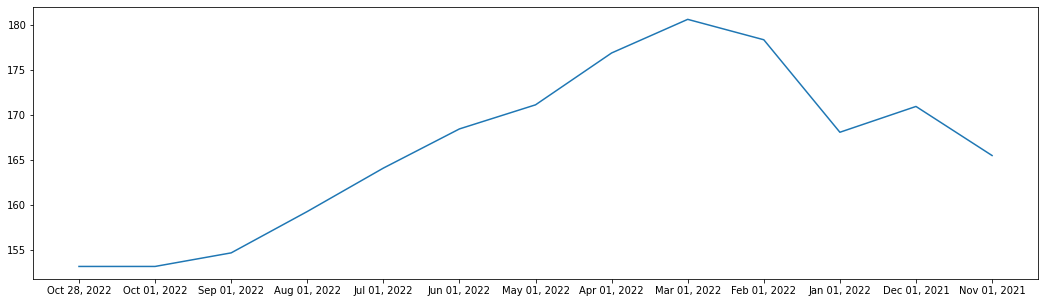

In [19]:
x = df.Date
y = df.Close
plt.figure(figsize=(18,5))
plt.plot(x,y)

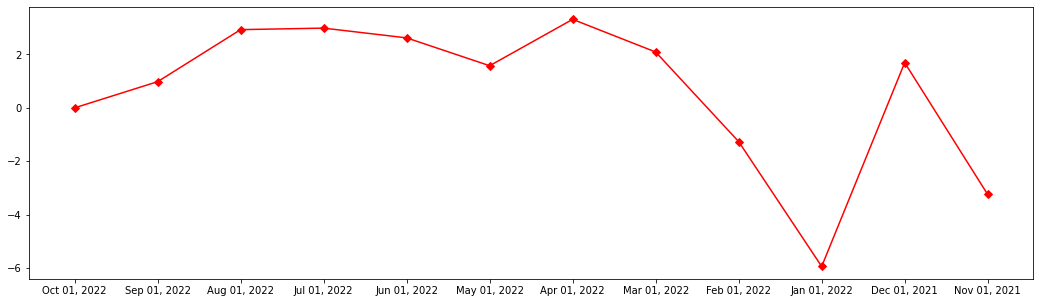

In [65]:
x = df.Date
y = maruti_ret
plt.figure(figsize=(18,5))
plt.plot(x,y, marker='D', color= 'r')

In [9]:
maruti_ret.dropna(inplace = True)
maruti_ret.describe()

count    12.000000
mean      0.645733
std       2.836715
min      -5.941660
25%      -0.316135
50%       1.635685
75%       2.699350
max       3.315920
Name: Close, dtype: float64

In [10]:
from scipy import stats
stats.describe(maruti_ret)

DescribeResult(nobs=12, minmax=(-5.94166, 3.31592), mean=0.6457333333333333, variance=8.04695341440606, skewness=-1.2290557924870875, kurtosis=0.4546336569039253)

(array([1., 1., 3., 7.]),
 array([-5.94166 , -3.627265, -1.31287 ,  1.001525,  3.31592 ]),
 <a list of 4 Patch objects>)

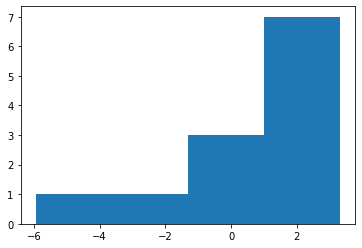

In [21]:
from scipy.stats import norm
plt.hist(maruti_ret, bins=4)

price test(hypothesis test)

In [23]:
stats.ttest_1samp(maruti_ret.sample(10), 0, alternative= 'two-sided')

Ttest_1sampResult(statistic=0.4783344871583213, pvalue=0.6438176402342365)

In [43]:
maruti_closing = pd.DataFrame(maruti_close, columns= ['Close'])
maruti_closing['lag1'] = maruti_closing.Close.shift(1)
maruti_closing['lag2'] = maruti_closing.Close.shift(2)
maruti_closing.dropna(inplace =True)
maruti_closing.head(5)

,Close,lag1,lag2
2,154.67,153.16,153.16
3,159.27,154.67,153.16
4,164.10,159.27,154.67
5,168.46,164.10,159.27
6,171.14,168.46,164.10


linear model

In [53]:
np.linalg.lstsq(maruti_closing[['lag1', 'lag2']], maruti_closing['Close'], rcond = None)[0]

array([ 1.24541791, -0.24186061])

ValueError: ignored